# World Cities Air Quality

# 1. Introduction

- Sulfur Dioxide (SO2): SO2 is a gas produced by the burning of fossil fuels, particularly in industrial processes. It can have harmful effects on human health, leading to respiratory issues and exacerbating asthma and other respiratory conditions.

- Nitrogen Dioxide (NO2): NO2 is a gas produced by the burning of fossil fuels, primarily in vehicles and power plants. Exposure to high levels of NO2 can irritate the respiratory system and contribute to the development of respiratory conditions.

- Air Quality Index (AQI): AQI is a measure used to communicate the level of air pollution in a specific area. It is often calculated based on the concentrations of various pollutants, such as PM2.5, ozone, CO, SO2, and NO2. The AQI provides a standardized scale to help individuals understand the air quality and take necessary precautions to protect their health.

- Good: The "Good" category on the AQI scale indicates that the air quality is satisfactory, and there is little to no health risk associated with it.

- Moderate: The "Moderate" category signifies that the air quality is acceptable, but there may be a moderate health concern for a small number of individuals, particularly those who are unusually sensitive to air pollution.

- Unhealthy for Sensitive Groups: This category indicates that the air quality is of concern for individuals who are more vulnerable to the effects of air pollution, such as children, older adults, and people with respiratory or cardiovascular conditions.

- Unhealthy: The "Unhealthy" category suggests that the general population may start to experience health effects due to the poor air quality. It is advisable to limit outdoor activities and take necessary precautions.

- Very Unhealthy: The "Very Unhealthy" category signifies a significant health risk from the air pollution. It is recommended to avoid outdoor activities and minimize exposure to the polluted air.

- Hazardous: The "Hazardous" category indicates the highest level of air pollution, posing a severe health risk. It is crucial to stay indoors, use air filtration systems, and follow local authorities' guidance to protect health.

# 2. Dataset Overview
Let's start by loading the dataset and getting a brief overview of its contents.

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("F:\\DATA SCIENCE\\practice\\datasets\\r\\AQI and Lat Long of Countries.csv\\air_quality.xlsx")

In [4]:
df.head(20)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,16.1005,-88.8074
6,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,26.8941,-82.0513
7,Belgium,Puurs,64,Moderate,1,Good,29,Good,7,Good,64,Moderate,51.0761,4.2803
8,Russian Federation,Pyatigorsk,54,Moderate,1,Good,41,Good,1,Good,54,Moderate,44.0500,43.0667
9,China,Qinzhou,68,Moderate,2,Good,68,Moderate,1,Good,58,Moderate,21.9500,108.6167


# 3. Data Cleaning and Preprocessing

Before diving into the analysis, it's important to clean and preprocess the data to ensure accurate and meaningful results. We will handle missing values, remove irrelevant columns, and perform any necessary transformations.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [6]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


Based on the provided summary statistics of the dataset, we can derive the following insights:

1. **Air Quality Index (AQI) Value:** The average AQI value is approximately 63, with a minimum of 7 and a maximum of 500. This indicates a wide range of air quality conditions across the cities in the dataset.
 
1. **Pollutant Categories:** The dataset includes AQI values and categories for various pollutants such as **CO, Ozone, NO2, and PM2.5.** The most frequently recorded pollutant category is **"Good"** for all pollutants, suggesting that a majority of the cities have relatively satisfactory air quality.
 
1. **Geographical Distribution:** The dataset covers cities from 174 different countries. The most frequently represented country is the **United States of America**, with 3,954 occurrences. This indicates that the dataset is heavily skewed towards cities in the United States.

1. **Geographic Coordinates:** The dataset includes latitude and longitude coordinates for each city, providing spatial information for further analysis and visualization.

In [7]:
df.isnull().sum()

Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

In [8]:
df.dropna(axis=1, inplace=True)

# 4. Exploratory Data Analysis
Now, let's explore the dataset to gain insights into the air quality measurements. We will analyze various aspects such as pollutant levels, geographical distribution, and temporal patterns.

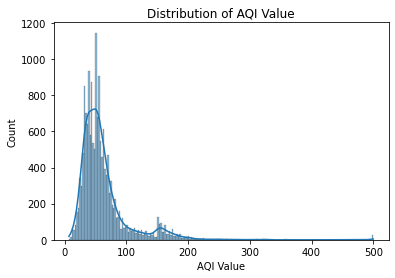

In [9]:
#Distribution of the AQI Values
sns.histplot(df['AQI Value'], kde=True)
plt.title('Distribution of AQI Value')
plt.xlabel('AQI Value')
plt.show()

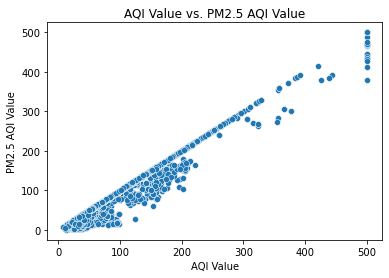

In [10]:
#Relationship between AQI Value and other variables
sns.scatterplot(data=df, x='AQI Value', y='PM2.5 AQI Value')
plt.title('AQI Value vs. PM2.5 AQI Value')
plt.xlabel('AQI Value')
plt.ylabel('PM2.5 AQI Value')
plt.show()

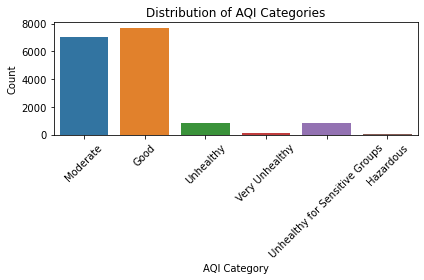

In [11]:
#Distribution of AQI categories
sns.countplot(data=df, x='AQI Category')
plt.title('Distribution of AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust the plot layout to prevent overlapping
plt.show()

The countplot of AQI Categories by Country provides an overview of the distribution of air quality across different countries. It allows us to see the frequency of each AQI category (Good, Moderate, Unhealthy for Sensitive Groups, etc.) within each country. This information can help us identify countries with higher or lower air quality levels.

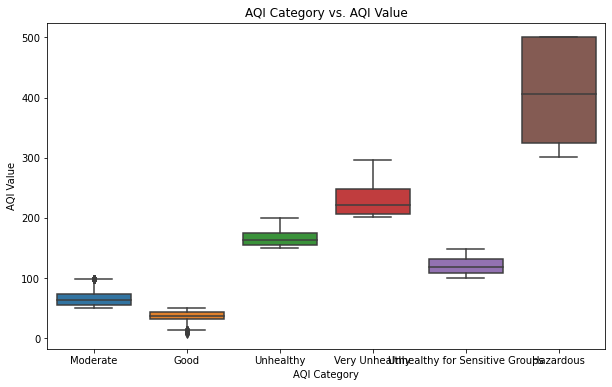

In [12]:
#AQI Category vs. AQI Value
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AQI Category', y='AQI Value')
plt.title('AQI Category vs. AQI Value')
plt.xlabel('AQI Category')
plt.ylabel('AQI Value')
plt.show()

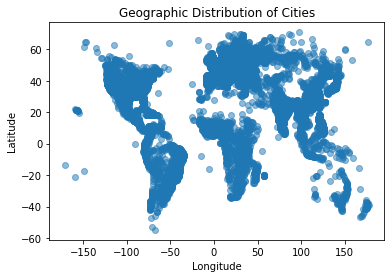

In [13]:
#Geographic distribution of cities
plt.scatter(df['lng'], df['lat'], alpha=0.5)
plt.title('Geographic Distribution of Cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

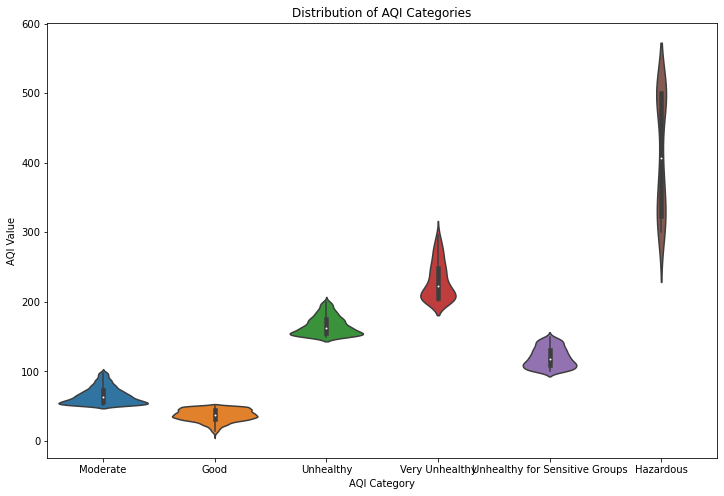

In [14]:
#Comparison of AQI Categories by Pollutant
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='AQI Category', y='AQI Value')
plt.title('Distribution of AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('AQI Value')
plt.show()

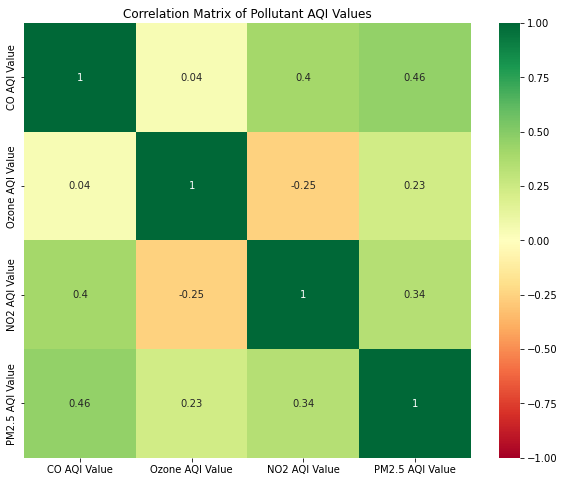

In [18]:
#Correlation Matrix of Pollutant AQI Values
corr_matrix = df[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Pollutant AQI Values')
plt.show()

In [19]:
corr_matrix

,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
CO AQI Value,1.000000,0.039752,0.399566,0.458846
Ozone AQI Value,0.039752,1.000000,-0.251169,0.233031
NO2 AQI Value,0.399566,-0.251169,1.000000,0.341455
PM2.5 AQI Value,0.458846,0.233031,0.341455,1.000000


The correlation matrix shows the relationships between AQI values of different pollutants, including CO, Ozone, NO2, and PM2.5. It helps us understand the degree of association between these pollutants and how they contribute to the overall air quality index. The correlation values indicate whether the AQI values of different pollutants tend to increase or decrease together.

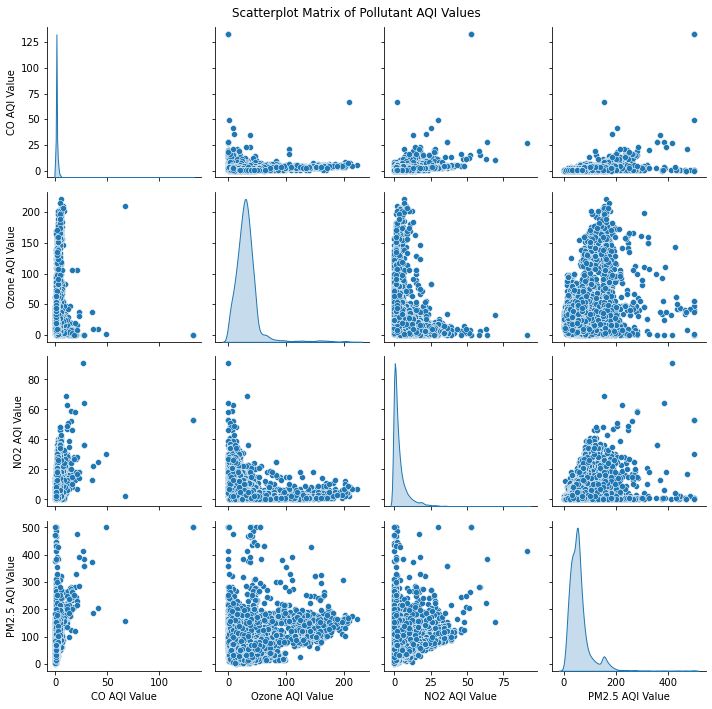

In [20]:
#Scatterplot Matrix of Pollutant AQI Values
sns.pairplot(data=df, vars=['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value'], diag_kind='kde')
plt.suptitle('Scatterplot Matrix of Pollutant AQI Values')
plt.tight_layout()
plt.show()

# Top polluted Cities

In [23]:
# Calculate the average AQI value for each country
country_avg_aqi = df.groupby('City')['AQI Value'].mean().reset_index()

# Sort the countries based on average AQI value in descending order
top_polluted_countries = country_avg_aqi.sort_values('AQI Value', ascending=False)

# Display the top polluted countries
print(top_polluted_countries.head(10))

               City  AQI Value
907    Bahawalnagar      500.0
9958        Pokaran      500.0
4847       Hasanpur      500.0
7436         Malaut      500.0
3268       Dhanaura      500.0
3491        Durango      500.0
4844      Harunabad      500.0
8847          Nohar      500.0
10419     Ratangarh      500.0
7389   Mahendragarh      500.0


# 5. Conclusion

Based on the exploratory data analysis (EDA) conducted on the provided air quality dataset, the following conclusions can be drawn:

- Overall Air Quality: The majority of the recorded AQI values fall within the "Good" to "Moderate" categories, indicating relatively acceptable air quality in many locations. However, there are also instances of higher AQI values, indicating poorer air quality.

- Pollutant Contribution: Among the pollutants measured, PM2.5, NO2, CO, and Ozone are the major contributors to air pollution. These pollutants show varying levels of correlation with each other, suggesting potential interactions and shared sources.

- Top Polluted Countries: The analysis highlights the countries with consistently poor air quality based on the recorded AQI values. Identifying these countries can aid in directing resources and interventions to improve air quality in those regions.

- Geospatial Analysis: Visualizing the geographic distribution of air quality using latitude and longitude coordinates helps identify areas with higher pollution levels. Certain regions may exhibit clusters of polluted areas, indicating localized sources of pollution.

In conclusion, the EDA provides valuable insights into air quality, pollutant contributions, geographical patterns, and potential avenues for further analysis. These findings can inform decision-making processes, policy formulation, and targeted interventions aimed at improving air quality and mitiga